# Homework #2: The Formation of Bonds and The Law of Mass Action
BIOL 6240 Fall 2024

## Section 1: Covalent Bond Formation

Electron orbitals have specific geometries because they interfere with one another when they come into contact. 

There are bonding pairs and lone pairs of electrons (filled subshells not involved in bonding). Lone pairs occupy more space and are less shielded due to their closer relative proximity to the nucleus, exerting repulsive forces on bonding pairs that result in regular geometric arrangements. [Valence Shell Electron Pair Repulsion theory](https://en.wikipedia.org/wiki/VSEPR_theory) (VSEPR) theory predicts specific bond angles and arrangements from their correlation with electron configuration.

Table of common configurations and bond angles: 
| Electron Pairs (Bonding + Lone) | Molecular Geometry   | Bond Angles        | Example     |
|----------------------------------|----------------------|--------------------|-------------|                             
| 2 (2 + 0)                        | Linear               | 180°               | BeCl₂       |
| 3 (3 + 0)                        | Trigonal Planar      | 120°               | BF₃         |
| 4 (4 + 0)                        | Tetrahedral          | 109.5°             | CH₄         |
| 4 (3 + 1)                        | Trigonal Pyramidal   | ~107°              | NH₃         |
| 4 (2 + 2)                        | Bent                 | ~104.5°            | H₂O         |
| 5 (5 + 0)                        | Trigonal Bipyramidal | 90°, 120°, 180°    | PCl₅        |
| 5 (4 + 1)                        | Seesaw               | <90°, <120°, <180° | SF₄         |
| 5 (3 + 2)                        | T-Shaped             | ~90°, ~180°        | ClF₃        |
| 6 (6 + 0)                        | Octahedral           | 90°                | SF₆         |
| 6 (5 + 1)                        | Square Pyramidal     | ~90°               | BrF₅        |
| 6 (4 + 2)                        | Square Planar        | 90°                | XeF₄        |


### The Morse Potential Describes Bond Energy as a Function of Atomic Distance

Simple example: Hydrogen has a $1s^{1}$ electron configuration in the ground state. When two hydrogens form hydride (H$_2$), each hydrogen takes on the electron configuration of Helium ($1s^2$). 

To model the bond energy as a function of interatomic distance for the hydride molecule, we can use a relation called the [Morse potential](https://en.wikipedia.org/wiki/Morse_potential). There are other models for this, but this one works well for covalent bonds. For ionic bonds, further research into the [Lennard-Jones Potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential) is encouraged. 

The Morse Potential $ U(r) (Joules)$ can be written:

$$ U(r) = D_{e}[1-e^{-\alpha(r-r_e)}]^{2}-D_{e}$$


### How to Sight Read the Equation: 

$$ U(r) = D_{e}[1-e^{-\alpha(r-r_e)}]^{2}-D_{e} $$

**Understanding the Components**:

1. Potential Energy Function: 
   - $ U(r) $ represents the potential energy as a function of the distance $ r $.
   - Note: Energy has two main forms:
       - `potential energy` is implied by an objects position. An object sitting on a hill has potential energy to roll down the hill.
       - A `positive` potential energy requires energy input to occur spontaneously, a `negative` potential energy will lose (dissipate) energy as it occurs spontaneously.
       - `kinetic energy` is the energy that depends on an objects motion, or the rate of change of momentum (the sum of the force moments that describe the object's trajectory). 

2. Bond Dissociation Energy:
   - $ D_e $ is the bond dissociation energy, indicating the depth of the energy well.

3. Bond Equilibrium Distance:
   - $ r_e $ is the bond equilibrium distance, the distance at which the potential energy is at a minimum.

4. Width Parameter:
   - $ \alpha $ is a parameter related to the width of the potential energy well, affecting how steeply the potential energy changes with distance.

Sight Reading Steps
1. Recognize the Structure:
   - The equation can be broken down into two main parts: $ D_{e}[1-e^{-\alpha(r-r_e)}]^{2} $ and $ -D_{e} $.

2. Parse the Exponential Term:
   - $ e^{-\alpha(r-r_e)} $:
     - Exponential function with an argument $ -\alpha(r-r_e) $.
     - $ \alpha $ scales the distance difference $ (r-r_e) $, affecting how quickly the potential changes.

3. Understand the Inner Bracket:
   - $ 1 - e^{-\alpha(r-r_e)} $:
     - Subtracts the exponential term from 1, representing a deviation from equilibrium.

4. Square the Bracket:
   - $ [1 - e^{-\alpha(r-r_e)}]^{2} $
     - Squaring this term ensures that the potential energy function is non-negative and has a quadratic dependency on the deviation.

5. Multiply by $ D_{e} $:
   - $ D_{e}[1 - e^{-\alpha(r-r_e)}]^{2} $
     - Scales the entire expression by the bond dissociation energy, setting the depth of the potential energy well.

6. Subtract $ D_{e} $:
   - $ D_{e}[1 - e^{-\alpha(r-r_e)}]^{2} - D_{e} $
     - Shifts the entire potential energy curve downward by $ D_{e} $, ensuring that $ U(r) = 0 $ at $ r = \infty $.

Interpretation
- The function $ U(r) $ describes a potential energy curve where:
  - The energy is at a minimum (most stable) at the equilibrium distance $ r_e $.
  - The depth of the energy well is given by $ D_{e} $.
  - The width and steepness of the well are controlled by $ \alpha $.

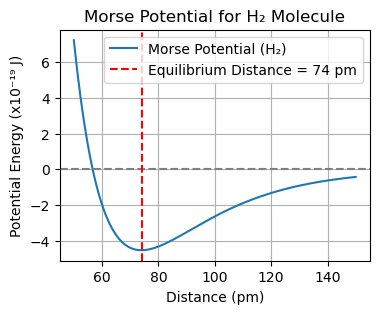

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def morse_potential(r, D_e, a, r_e):
    """
    Parameters:
        r (numpy array): Array of distances (in meters).
        D_e (float): Bond dissociation energy (in joules).
        a (float): Width parameter of the potential well (in 1/meters).
        r_e (float): Equilibrium bond distance (in meters).
    
    Returns:
        U (numpy array): Morse potential energy (in joules).
    """
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# Constants for H2 molecule (hydrogen molecule)
D_e = 4.52e-19  # Bond dissociation energy in joules (approximately 436 kJ/mol)
r_e = 74e-12    # Equilibrium bond distance in meters (74 pm)
a = 4e10      # Width parameter in 1/meters (approximate value)

# Generate an array of distances from 50 pm to 150 pm
r = np.linspace(50e-12, 150e-12, 500)

# Calculate the Morse potential energy for these distances
U = morse_potential(r, D_e, a, r_e)

# Plot the potential energy as a function of distance
plt.figure(figsize=(4, 3))
plt.plot(r * 1e12, U * 1e19, label='Morse Potential (H₂)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(r_e * 1e12, color='red', linestyle='--', label=f'Equilibrium Distance = {r_e * 1e12:.0f} pm')
plt.xlabel('Distance (pm)')
plt.ylabel('Potential Energy (x10⁻¹⁹ J)')
plt.title('Morse Potential for H₂ Molecule')
plt.legend()
plt.grid(True)
plt.show()


### Q11: Describe the extreme behavior of the bond energy (i.e., as the interatomic distance approaches 0 and $\infty$ picometers (pm) respectively. 

Your answer here...

### Q12: Use the trends in the Morse potential plot to explain why the hydrogen atoms don't crash into one another. 
 
Your answer here..

### Q13: Approximately how close (in pm) do two hydrogen atoms need to be to form a covalent bond? 
 
Your answer here..

### Q14: The bond distance, under these conditions, is 74 pm. The atomic radius of a hydrogen is 54 pm. What is the total length of a hydride atom at its widest dimension?

Your answer here...

### Q15: If you increased the temperature of the reaction mixture, what do you predict would happen to the value of the equilibrium bond distance $r_e$? 

Your Answer Here..